In [3]:
!pip install sdv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 36.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using

In [4]:
import sdv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
print(sdv.version.public)

1.12.1


In [6]:
data = pd.read_csv(r"/content/drive/MyDrive/datasets/Mall_Customers (1).csv")
data


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
data['Genre'].head(3)

0      Male
1      Male
2    Female
Name: Genre, dtype: object

In [8]:
data['Annual Income (k$)'].head(3)

0    15
1    15
2    16
Name: Annual Income (k$), dtype: int64

In [9]:
from sdv.metadata import SingleTableMetadata


metadata = SingleTableMetadata()

In [10]:
metadata.detect_from_dataframe(data)


In [11]:
python_dict = metadata.to_dict()


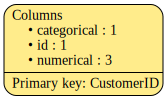

In [12]:
metadata.visualize(
    show_table_details='summarized',
    output_filepath='my_metadata.png'
)


In [13]:
metadata.get_column_names(sdtype='unknown')

[]

In [14]:
[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']



['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [15]:
metadata.validate()

In [16]:

metadata.set_primary_key(column_name='CustomerID')

/usr/local/lib/python3.10/dist-packages/sdv/metadata/single_table.py:667: UserWarning: There is an existing primary key 'CustomerID'. This key will be removed.
  warnings.warn(


In [17]:
metadata.remove_primary_key()

In [18]:
from sdv.single_table import GaussianCopulaSynthesizer


synthesizer = GaussianCopulaSynthesizer(metadata)

synthesizer.fit(data)


synthetic_data = synthesizer.sample(num_rows=500)

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:82: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [19]:
metadata.save_to_json(filepath='my_metadata_v1.json')

In [20]:
synthesizer = GaussianCopulaSynthesizer(
    metadata, # required
    enforce_min_max_values=True,
    enforce_rounding=False,
    numerical_distributions={
        'Annual Income (k$)': 'beta',
        'Spending Score (1-100)': 'uniform'
    },
    default_distribution='norm'
)

In [21]:
synthesizer.get_parameters()

{'enforce_min_max_values': True,
 'enforce_rounding': False,
 'locales': ['en_US'],
 'numerical_distributions': {'Annual Income (k$)': 'beta',
  'Spending Score (1-100)': 'uniform'},
 'default_distribution': 'norm'}

In [22]:
metadata = synthesizer.get_metadata()

In [23]:
synthesizer.fit(data)

In [24]:
synthesizer.get_learned_distributions()

{'Genre': {'distribution': 'norm',
  'learned_parameters': {'loc': 0.49223087611523836,
   'scale': 0.2730030418873652}},
 'Age': {'distribution': 'norm',
  'learned_parameters': {'loc': 38.85, 'scale': 13.934041050606963}},
 'Annual Income (k$)': {'distribution': 'beta',
  'learned_parameters': {'loc': 13.41743068155646,
   'scale': 135.19563752356004,
   'a': 1.550724035925752,
   'b': 2.938877177428231}},
 'Spending Score (1-100)': {'distribution': 'uniform',
  'learned_parameters': {'loc': 1.0, 'scale': 98.0}}}

In [25]:
synthesizer.save(
    filepath='my_synthesizer.pkl'
)

In [26]:
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer.load(
    filepath='my_synthesizer.pkl'
)

In [27]:
synthesizer.auto_assign_transformers(data)

In [28]:
synthesizer.get_transformers()

{'CustomerID': AnonymizedFaker(function_name='bothify', function_kwargs={'text': '#########'}),
 'Genre': UniformEncoder(),
 'Age': FloatFormatter(enforce_min_max_values=True),
 'Annual Income (k$)': FloatFormatter(enforce_min_max_values=True),
 'Spending Score (1-100)': FloatFormatter(enforce_min_max_values=True)}

In [31]:
from rdt.transformers import FloatFormatter

synthesizer.update_transformers(column_name_to_transformer={
    'Annual Income (k$)':FloatFormatter(missing_value_replacement=0.0)
})

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:222: UserWarning: For this change to take effect, please refit the synthesizer using `fit`.
  warnings.warn(msg, UserWarning)


In [32]:
processed_data = synthesizer.preprocess(data)

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:369: UserWarning: This model has already been fitted. To use the new preprocessed data, please refit the model using 'fit' or 'fit_processed_data'.
  warnings.warn(


In [33]:
synthesizer.fit_processed_data(processed_data)

In [35]:
synthetic_data = synthesizer.sample(num_rows=1_000_000)

# save the data as a CSV
synthetic_data.to_csv('synthetic_data.csv', index=False)

In [36]:
synthetic_data = synthesizer.sample(
    num_rows=1_000_000,
    batch_size=1_000
)

Sampling rows: 100%|██████████| 1000000/1000000 [01:07<00:00, 14747.92it/s]


In [38]:
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality
from sdv.evaluation.single_table import get_column_plot

# 1. perform basic validity checks
diagnostic = run_diagnostic(data, synthetic_data, metadata)

# 2. measure the statistical similarity
quality_report = evaluate_quality(data, synthetic_data, metadata)

# 3. plot the data
fig = get_column_plot(
    real_data=data,
    synthetic_data=synthetic_data,
    metadata=metadata,
    column_name='Annual Income (k$)'
)

fig.show()

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 5/5 [00:00<00:00, 44.59it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 212.87it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 5/5 [00:00<00:00,  9.31it/s]|
Column Shapes Score: 92.82%

(2/2) Evaluating Column Pair Trends: |██████████| 10/10 [00:03<00:00,  2.89it/s]|
Column Pair Trends Score: 90.28%

Overall Score (Average): 91.55%



In [41]:
synthetic_data.head(3000)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,96858303,Female,34,100,83
1,409140672,Male,40,27,61
2,913920895,Female,43,120,48
3,145640776,Male,39,58,54
4,277842049,Female,43,100,10
...,...,...,...,...,...
2995,421846701,Male,35,63,92
2996,864831677,Female,56,48,17
2997,488060692,Female,18,66,40
2998,660383726,Female,36,34,74
